# The Impact of Mental Health on Suicide Rates Across Countries

### Authors: Nick Ng, Kevin Tat, Keaton Staggs

In [299]:
!pip install geopandas
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   ---- ----------------------------------- 30.7/294.9 kB 1.3 MB/s eta 0:00:01
   --------- ----------------------------- 71.7/294.9 kB 491.5 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/294.9 kB 654.9 kB/s eta 0:00:01
   ------------------------------------- -- 276.5/294.9 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00


In [300]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [347]:
suicide_data = pd.read_csv("combined_processed_data.csv")
gdp_data = pd.read_csv("gdp_1960_2020.csv")
WHO_data = pd.read_csv("GHED_data.csv", encoding='latin1')
mental_health_data = pd.read_csv("mental_disorder_data_cleaned.csv")

C:\Users\theaw\AppData\Local\Temp\ipykernel_19348\743709329.py:3: DtypeWarning: Columns (6,22,23,24,36,38,102,103,104,105,109,110,111,117,119,125,126,127,128,132,133,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,240,241,242,243,244,245,247,248,249,250,251,253,254,255,256,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,34

## Data Cleaning

In [348]:
def clean_country_name(s):
    if "United States" in s:
        return "United States"
    return s

In [349]:
all_df = [suicide_data, gdp_data, WHO_data, mental_health_data]
col_name = ["Country Name", "country", "country", "Entity"]
countries = ["Japan", "United States", "Germany", "Egypt", "Brazil", "Australia", "Spain", "Italy", "Mexico", "Denmark"]
for i in range(len(all_df)):
    all_df[i][col_name[i]] = all_df[i][col_name[i]].apply(clean_country_name)
    all_df[i] = all_df[i].loc[all_df[i][col_name[i]].isin(countries)]

suicide_data_filtered = all_df[0]
gdp_data_filtered = all_df[1]
WHO_data_filtered = all_df[2]
mental_health_data_filtered = all_df[3]
mental_health_data_filtered["Year"] = mental_health_data_filtered["Year"].astype(int)

KeyError: 'Entity'

In [350]:
mental_health_data_filtered

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
308,308,Australia,AUS,1990,0.360489,1.129134,0.700091,6.525294,2.133236,4.621187,1.352910
309,309,Australia,AUS,1991,0.361196,1.132647,0.704109,6.519968,2.185893,4.671933,1.392997
310,310,Australia,AUS,1992,0.361893,1.135936,0.708001,6.513663,2.235080,4.715412,1.430158
311,311,Australia,AUS,1993,0.362524,1.13879,0.713708,6.505452,2.275939,4.754454,1.462686
312,312,Australia,AUS,1994,0.363001,1.140927,0.719508,6.494057,2.308155,4.783948,1.488673
...,...,...,...,...,...,...,...,...,...,...,...
108212,108212,United States,VIR,2013,3467.251866,NaN,NaN,NaN,NaN,NaN,NaN
108213,108213,United States,VIR,2014,3472.283851,NaN,NaN,NaN,NaN,NaN,NaN
108214,108214,United States,VIR,2015,3475.910067,NaN,NaN,NaN,NaN,NaN,NaN
108215,108215,United States,VIR,2016,3475.46915,NaN,NaN,NaN,NaN,NaN,NaN


In [351]:
gdp_suicide = suicide_data_filtered.merge(gdp_data_filtered, left_on=["Country Name", "Year"], right_on=["country", "year"], how="left")
WHO_suicide = suicide_data_filtered.merge(WHO_data_filtered, left_on = ["Country Name", "Year"], right_on = ["country", "year"], how = "left")
mental_suicide = suicide_data_filtered.merge(mental_health_data_filtered, left_on = ["Country Name", "Year"], right_on = ["Entity", "Year"], how = "left")


## Basic Overview

C:\Users\theaw\AppData\Local\Temp\ipykernel_19348\3686334535.py:1: FutureWarning: 

The `errwidth` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'linewidth': 0}` instead.

  sns.catplot(data=suicide_data_filtered[suicide_data_filtered["Year"] == 2019], x="Country Name", y="Death rate per 100 000 population", kind="bar", hue="Sex", errwidth=0)


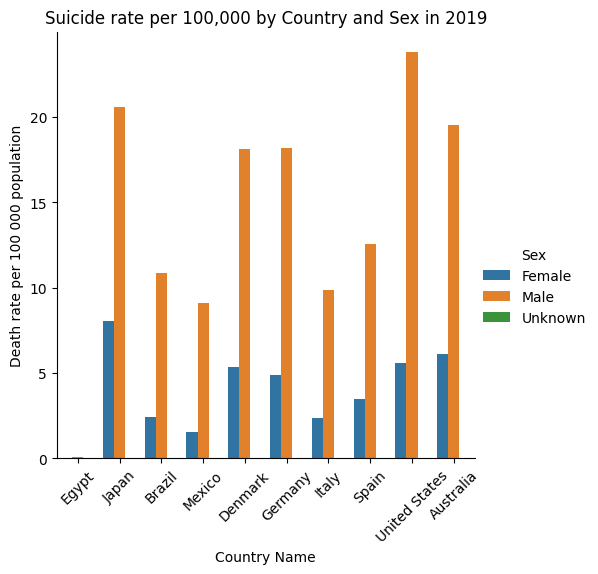

In [352]:
sns.catplot(data=suicide_data_filtered[suicide_data_filtered["Year"] == 2019], x="Country Name", y="Death rate per 100 000 population", kind="bar", hue="Sex", errwidth=0)
plt.title("Suicide rate per 100,000 by Country and Sex in 2019")
plt.xticks(rotation=45)
plt.show()

C:\Users\theaw\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)


Text(0.5, 1.0, 'Suicide Rate per Country From 1950 - 2020')

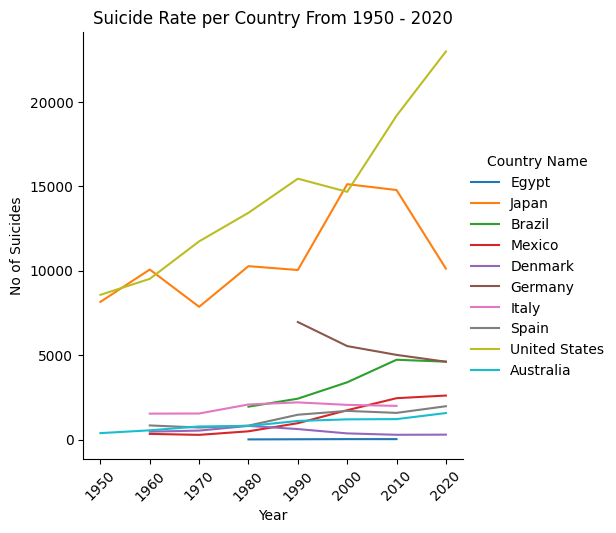

In [353]:
filtered_data = suicide_data_filtered[suicide_data_filtered['Year'] % 10 == 0]
sns.relplot(data=filtered_data, x="Year", y="No of Suicides", hue="Country Name", kind="line", ci=None)
plt.xticks(rotation=45)
plt.title("Suicide Rate per Country From 1950 - 2020")

## How does the GDP of the country contribute to suicide rates?

In [354]:
display(gdp_suicide)

,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population,year,rank,country,state,gdp,gdp_percent
0,Africa,Egypt,1965,Female,0.0,0.0,0.0,0.0,6.0,1.0,...,0.0,11.0,0.026743,0.074515,1965.0,35.0,Egypt,Africa,4.948668e+09,0.002901
1,Africa,Egypt,1965,Male,0.0,0.0,0.0,0.0,5.0,3.0,...,0.0,21.0,0.035830,0.133735,1965.0,35.0,Egypt,Africa,4.948668e+09,0.002901
2,Africa,Egypt,1973,Female,0.0,0.0,1.0,1.0,2.0,3.0,...,0.0,15.0,0.022613,0.132515,1973.0,39.0,Egypt,Africa,1.009853e+10,0.002313
3,Africa,Egypt,1973,Male,0.0,0.0,2.0,1.0,3.0,0.0,...,0.0,17.0,0.017995,0.104396,1973.0,39.0,Egypt,Africa,1.009853e+10,0.002313
4,Africa,Egypt,1974,Female,0.0,0.0,0.0,1.0,0.0,2.0,...,0.0,5.0,0.010336,0.024010,1974.0,48.0,Egypt,Africa,9.228963e+09,0.001833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212,Oceania,Australia,2019,Male,0.0,0.0,0.0,10.0,126.0,219.0,...,0.0,2536.0,11.494400,19.510694,2019.0,13.0,Australia,Oceania,1.396567e+12,0.016191
1213,Oceania,Australia,2020,Female,0.0,0.0,1.0,10.0,44.0,61.0,...,0.0,755.0,8.652443,5.457329,2020.0,12.0,Australia,Oceania,1.330901e+12,0.017164
1214,Oceania,Australia,2020,Male,0.0,0.0,0.0,15.0,130.0,219.0,...,0.0,2384.0,11.740468,18.468528,2020.0,12.0,Australia,Oceania,1.330901e+12,0.017164
1215,Oceania,Australia,2021,Female,0.0,0.0,0.0,18.0,51.0,71.0,...,0.0,786.0,9.612707,5.675261,NaN,NaN,NaN,NaN,NaN,NaN


In [355]:
gdp_suicide[gdp_suicide["Year"] == 2019]

,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,Unknown Age,No of Suicides,Percentage of cause-specific deaths out of total deaths,Death rate per 100 000 population,year,rank,country,state,gdp,gdp_percent
58,Africa,Egypt,2019,Female,0.0,0.0,1.0,0.0,9.0,2.0,...,0.0,18.0,0.035399,0.026640,2019.0,39.0,Egypt,Africa,3.030809e+11,0.003514
59,Africa,Egypt,2019,Male,0.0,0.0,1.0,6.0,7.0,5.0,...,0.0,54.0,0.052907,0.086046,2019.0,39.0,Egypt,Africa,3.030809e+11,0.003514
198,Asia,Japan,2019,Female,0.0,0.0,0.0,43.0,178.0,292.0,...,5.0,5762.0,12.592486,8.057883,2019.0,3.0,Japan,Asia,5.064873e+12,0.058718
199,Asia,Japan,2019,Male,0.0,0.0,0.0,47.0,386.0,748.0,...,31.0,13673.0,16.047609,20.592285,2019.0,3.0,Japan,Asia,5.064873e+12,0.058718
299,Central and South America,Brazil,2019,Female,0.0,0.0,0.0,104.0,273.0,320.0,...,0.0,2921.0,1.930815,2.443925,2019.0,9.0,Brazil,America,1.877811e+12,0.021770
300,Central and South America,Brazil,2019,Male,0.0,0.0,2.0,85.0,749.0,1142.0,...,12.0,10600.0,2.207535,10.877931,2019.0,9.0,Brazil,America,1.877811e+12,0.021770
301,Central and South America,Brazil,2019,Unknown,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,0.896057,0.000000,2019.0,9.0,Brazil,America,1.877811e+12,0.021770
445,Central and South America,Mexico,2019,Female,0.0,0.0,0.0,75.0,254.0,195.0,...,3.0,1300.0,1.815433,1.570293,2019.0,15.0,Mexico,America,1.268871e+12,0.014710
446,Central and South America,Mexico,2019,Male,0.0,0.0,0.0,125.0,566.0,851.0,...,45.0,5833.0,2.432687,9.107248,2019.0,15.0,Mexico,America,1.268871e+12,0.014710
447,Central and South America,Mexico,2019,Unknown,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,3.0,10.000000,0.000000,2019.0,15.0,Mexico,America,1.268871e+12,0.014710


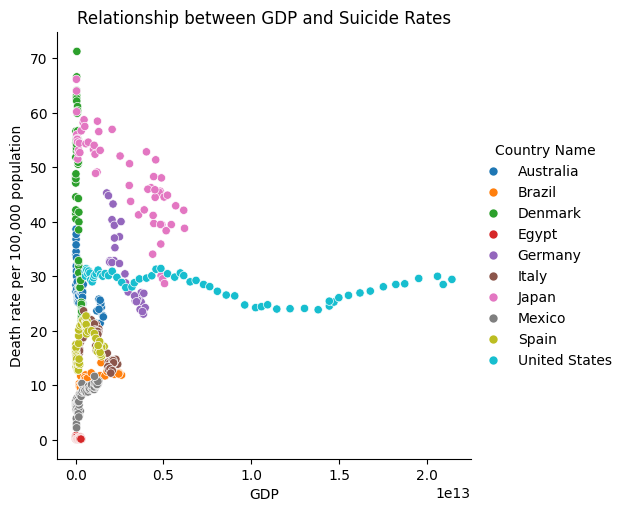

In [358]:
gdp_suicide_grouped = gdp_suicide.groupby(["Country Name", "Year"])["Death rate per 100 000 population"].sum().reset_index()
gdp_suicide_merged = gdp_suicide_grouped.merge(gdp_data_filtered, left_on=["Country Name", "Year"], right_on=["country", "year"], how="left")

sns.relplot(data=gdp_suicide_merged, x="gdp", y="Death rate per 100 000 population", hue="Country Name")
plt.xlabel("GDP")
plt.ylabel("Death rate per 100,000 population")
plt.title("Relationship between GDP and Suicide Rates")
plt.show()


In [343]:
mental_suicide

,Region Name,Country Name,Year,Sex,0 Year,1-4 Years,5-9 Years,10-14 Years,15-19 Years,20-24 Years,...,index,Entity,Code,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Africa,Egypt,1965,Female,0.0,0.0,0.0,0.0,6.0,1.0,...,19106.0,Egypt,EGY,NaN,NaN,30433000.000000,NaN,NaN,NaN,NaN
1,Africa,Egypt,1965,Female,0.0,0.0,0.0,0.0,6.0,1.0,...,66914.0,Egypt,EGY,NaN,NaN,30433000.0,NaN,NaN,NaN,NaN
2,Africa,Egypt,1965,Male,0.0,0.0,0.0,0.0,5.0,3.0,...,19106.0,Egypt,EGY,NaN,NaN,30433000.000000,NaN,NaN,NaN,NaN
3,Africa,Egypt,1965,Male,0.0,0.0,0.0,0.0,5.0,3.0,...,66914.0,Egypt,EGY,NaN,NaN,30433000.0,NaN,NaN,NaN,NaN
4,Africa,Egypt,1973,Female,0.0,0.0,1.0,1.0,2.0,3.0,...,19114.0,Egypt,EGY,NaN,NaN,36897000.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3929,Oceania,Australia,2019,Male,0.0,0.0,0.0,10.0,126.0,219.0,...,56766.0,Australia,AUS,NaN,NaN,25203000.000000,NaN,NaN,NaN,NaN
3930,Oceania,Australia,2020,Female,0.0,0.0,1.0,10.0,44.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3931,Oceania,Australia,2020,Male,0.0,0.0,0.0,15.0,130.0,219.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3932,Oceania,Australia,2021,Female,0.0,0.0,0.0,18.0,51.0,71.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
